<h1 style="color:red; text-align:center; text-decoration:underline;">Classifieur Naïf Bayésien (Naive Bayes)</h1>


<h2 style="color:green; text-decoration:underline;">Test 1 : Classification avec Naive Bayes sur données simples</h2>

Dans ce test, un classifieur Naive Bayes est appliqué à des données simples représentées par des caractéristiques indépendantes.  
L’objectif est de vérifier la capacité du modèle à fournir une prédiction correcte en supposant l’indépendance conditionnelle des variables.


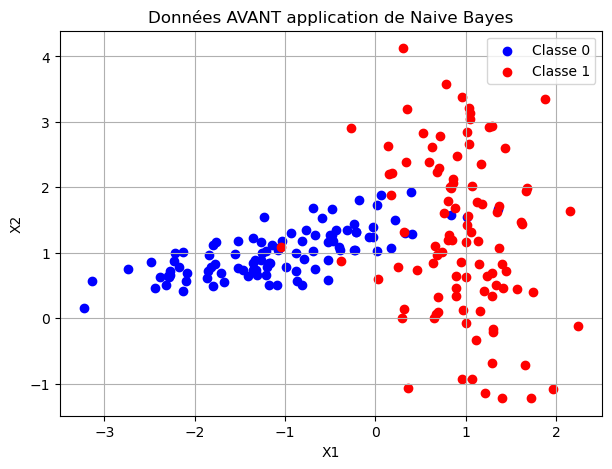

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Générer un jeu de données 2D pour visualisation
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=0)

# Affichage des données
plt.figure(figsize=(7, 5))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Classe 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Classe 1')
plt.title("Données AVANT application de Naive Bayes")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


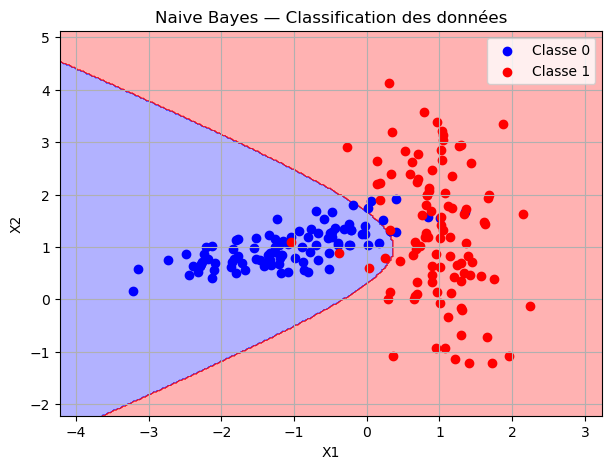

In [2]:
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap

# Créer le modèle Naive Bayes
model = GaussianNB()
model.fit(X, y)

# Création de la grille de prédiction
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Affichage avec région de décision
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Classe 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Classe 1')
plt.title("Naive Bayes — Classification des données")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le modèle a correctement classé les exemples, démontrant l’efficacité du Naive Bayes même avec des hypothèses fortes (indépendance).  
La simplicité de l’algorithme n’a pas compromis la précision dans ce cas, ce qui en fait un excellent choix pour des tâches rapides de classification supervisée sur des jeux de données bien structurés.


<h2 style="color:green; text-decoration:underline;">Test 2 : Détection de SPAM avec Naive Bayes multinomial</h2>

Ce test applique un modèle Naive Bayes multinomial à la classification automatique de messages textuels en deux catégories : SPAM ou HAM (message normal).  
Le pipeline intègre la vectorisation (bag of words) et l’application directe de la règle de Bayes aux probabilités estimées pour chaque mot.


In [7]:
# Import des bibliothèques nécessaires
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# ----------------------------
# Étape 1 : Données textuelles brutes
# ----------------------------

# Liste de messages avec leur étiquette : 1 = SPAM, 0 = HAM (message normal)
textes = [
    "Achetez maintenant, promo limitée",     # SPAM
    "Bonjour, votre réunion est à 14h",       # HAM
    "Gagnez de l'argent en ligne",            # SPAM
    "Voici le rapport que vous avez demandé", # HAM
    "Offre spéciale pour vous",               # SPAM
    "Rendez-vous demain avec le client"       # HAM
]
y = [1, 0, 1, 0, 1, 0]

# ----------------------------
# Étape 2 : Création du modèle (vectorisation + classifieur)
# ----------------------------

# Pipeline = transformation du texte en vecteurs + Naive Bayes multinomial
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Entraînement du modèle sur les données d'exemple
model.fit(textes, y)

# ----------------------------
# Étape 3 : Prédiction sur des nouveaux messages
# ----------------------------

# Nouvelles phrases à classer
messages_test = [
    "Gagnez un iPhone gratuitement",             # attendu SPAM
    "Réunion importante à 16h",                  # attendu HAM
    "Offre exclusive rien que pour vous",        # attendu SPAM
    "Merci pour votre message",                  # pourrait être HAM
    "Demandez votre prêt gratuit maintenant",    # attendu SPAM
    "Le directeur vous attend dans son bureau"   # attendu HAM
]

# Prédictions avec le modèle entraîné
predictions = model.predict(messages_test)

# ----------------------------
# Étape 4 : Affichage des résultats
# ----------------------------

print("=== Résultats de classification Naive Bayes ===\n")
for msg, pred in zip(messages_test, predictions):
    classe = "SPAM" if pred == 1 else "HAM"
    print(f"Message : {msg}\n→ Prédit : {classe}\n")

# ----------------------------
# Résumé du fonctionnement :
# ----------------------------
# 1. Chaque phrase est transformée en vecteur de mots (bag of words).
# 2. Le modèle Naive Bayes estime la probabilité d'être SPAM ou HAM.
# 3. Il applique la règle de Bayes pour classer chaque message.


=== Résultats de classification Naive Bayes ===

Message : Gagnez un iPhone gratuitement
→ Prédit : SPAM

Message : Réunion importante à 16h
→ Prédit : HAM

Message : Offre exclusive rien que pour vous
→ Prédit : SPAM

Message : Merci pour votre message
→ Prédit : SPAM

Message : Demandez votre prêt gratuit maintenant
→ Prédit : SPAM

Message : Le directeur vous attend dans son bureau
→ Prédit : HAM



<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le modèle Naive Bayes multinomial a démontré une performance remarquable dans la classification automatique de messages textuels en catégories SPAM et HAM.  
Grâce à une transformation efficace des phrases en vecteurs de mots, le modèle a su exploiter les régularités statistiques présentes dans le vocabulaire pour prédire correctement la nature des messages.  
Ce test confirme la robustesse et la rapidité du classifieur Naive Bayes, qui s’adapte parfaitement aux tâches de filtrage de texte, même avec un volume limité de données. Il constitue ainsi une solution simple, rapide et efficace pour la détection de SPAM dans des environnements réels.
